# Диаграмма рассеяния

Часто нужно понимать, как разные значения зависят друг от друга. Возьмём, к примеру, данные о росте height (англ. «рост») и весе weight (англ. «вес») людей. Загрузите датасет, содержащий эти данные в переменную **hw**, просмотрите информацию о нем.

In [34]:
import pandas as pd
hw = pd.read_csv('weight-height.csv')
hw.info()
hw.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


Обратите внимание, что рост и вес отличаются от привычных нам. Это из-за другой системы измерений: дюймы и фунты, вместо сантиметров и килограмм.

Исправьте систему измерений, переведя рост в сантиметры, а вес в килограммы.


In [35]:
hw['Weight'] = hw['Weight'] * 0.453
hw['Height'] = hw['Height'] * 2.54

Изучим числовые характеристики и гистограммы::

In [36]:
hw.describe() 
 

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.132482
std,9.772721,14.545123
min,137.828359,29.309157
25%,161.304276,61.525577
50%,168.447898,73.029456
75%,175.702625,84.787795
max,200.656806,122.305333


array([[<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

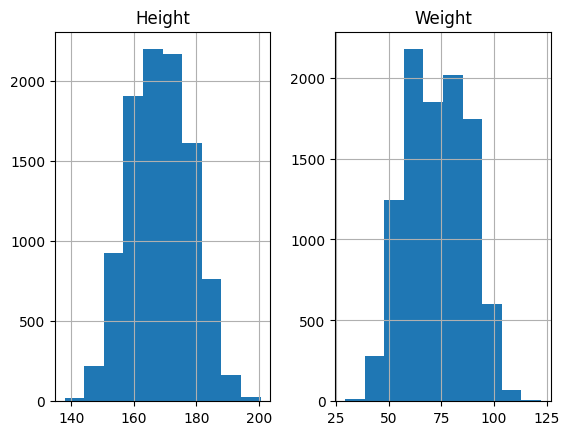

In [37]:
hw.hist()

Гистограммы похожи на графики нормального распределения. 

Чтобы найти связь между ростом и весом, их тоже нужно отметить на одном графике, а не отдельных гистограммах. Пустим рост и вес по осям x и y соответственно:

<Axes: xlabel='Height'>

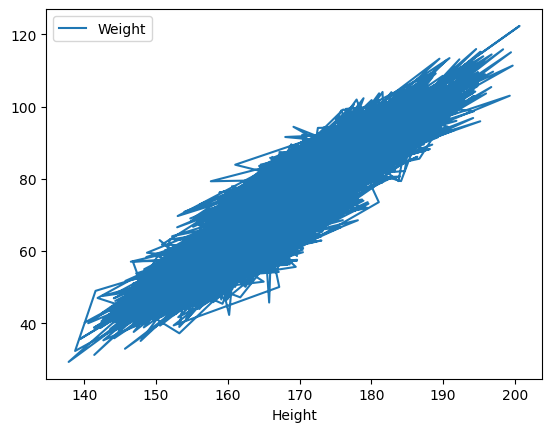

In [38]:
hw.plot(x='Height', y='Weight') 

Мохнатое нечто. Совсем не то, что вы ожидали увидеть.
Исходные данные не были отсортированы. Да и рост каждого следующего человека никак не связан с ростом предыдущего. 

Избавимся от мешанины прыгающих значений, соединённых линиями.

Отсортируем данные:


<Axes: xlabel='Height'>

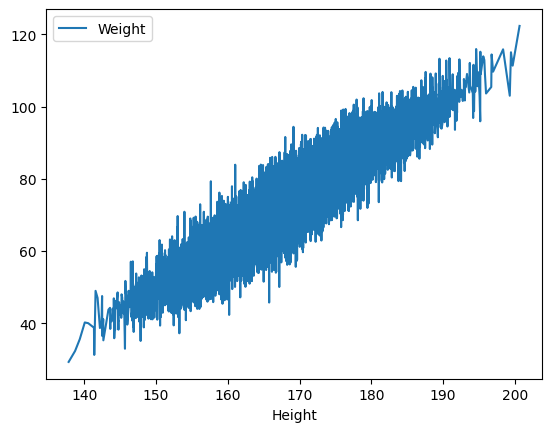

In [39]:
hw.sort_values('Height').plot(x='Height', y='Weight') 

Мохнатое нечто стремится. Линии по-прежнему путают.

График, где значения соединяются линиями, хорош, если иллюстрирует непрерывную связь. Например, на графике почасового изменения температуры уместно соединить точки замеров в 8 часов утра и в 9. А вот люди в наших наблюдениях никак не связаны друг с другом. Гораздо лучше обозначить отдельные сочетания роста и веса точками. 

Это возможно на особом типе графиков — **scatter** (англ. «разброс, рассеивание»). Передадим значение **scatter** параметру **kind** метода **plot()**:

<Axes: xlabel='Height', ylabel='Weight'>

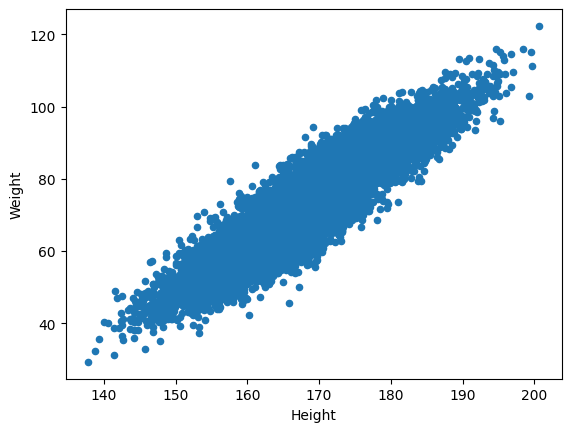

In [40]:
hw.plot(x='Height', y='Weight', kind='scatter') 

Такой график уже лучше отражает действительность. Есть основная масса точек с наиболее частыми сочетаниями веса и роста. При этом с увеличением роста увеличивается и вес. Но это лишь в среднем. Можно найти уникальные примеры людей с большим весом и малым ростом. Однако есть и совсем пустые зоны: например, люди ростом более 180 см не весят меньше 50 кг.
На графике можно увидеть взаимосвязь между двумя величинами. А также понять, какие данные типичны, а какие — аномальны.
Так, если нам скажут, что есть человек с ростом 190 см и весом 50 кг, мы ответим, что либо неправильно измеряли, либо это очень редкий человек. А про индивида ростом 170 см и весом более 70 кг известно, что его вес превышает типичное для его роста значение.

## Задача 1
Постройте график по данным из **station_stat_full**, где для каждой АЗС будет отдельная точка: по горизонтальной оси — число заездов на АЗС, по вертикальной — медианное время заправки. Добавьте линии сетки.


<Axes: xlabel='Число заездов на АЗС', ylabel='Медианное вреся заправки'>

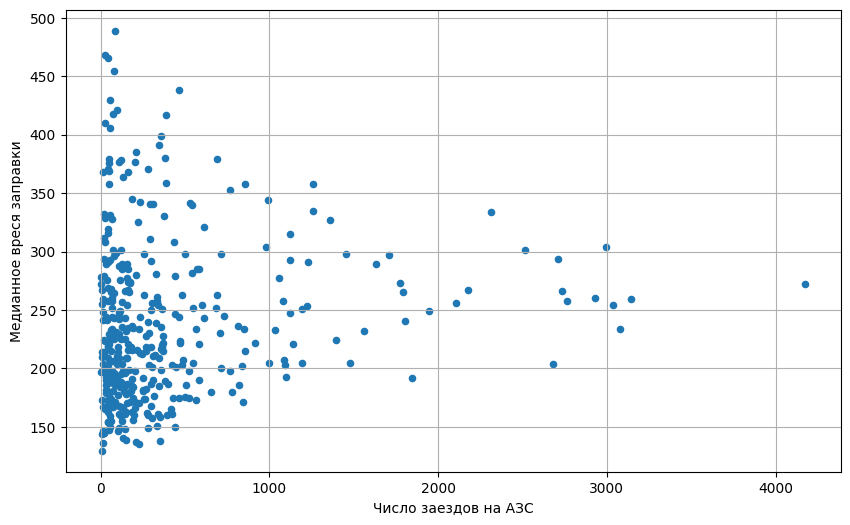

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
station_stat_full = pd.read_csv('station_stat_full.csv')
station_stat_full.plot(x='count', y='time_spent', kind='scatter', grid=True, figsize=(10,6), xlabel='Число заездов на АЗС', ylabel='Медианное вреся заправки')

# Корреляция
 
Очевидный недостаток этого графика в том, что посередине — огромное количество точек, слившихся в единую массу. В облаке значений не разглядеть области более высокой плотности. Есть два способа сделать график нагляднее.
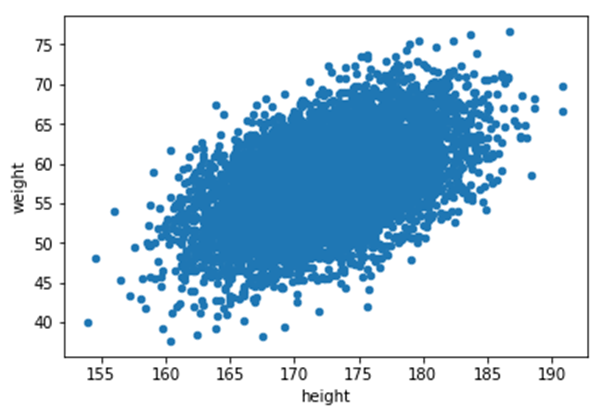

Способ 1.
Сделаем точки полупрозрачными, задав параметр **alpha**. Попробуем подобрать его оптимальное значение:


<Axes: xlabel='Height', ylabel='Weight'>

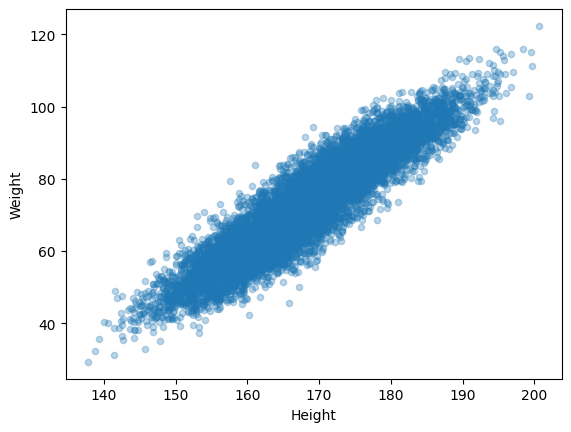

In [42]:
hw.plot(x='Height', y='Weight', kind='scatter', alpha=0.3)

С таким значением **alpha** стало несильно лучше. Уменьшим **alpha** в 10 раз:

<Axes: xlabel='Height', ylabel='Weight'>

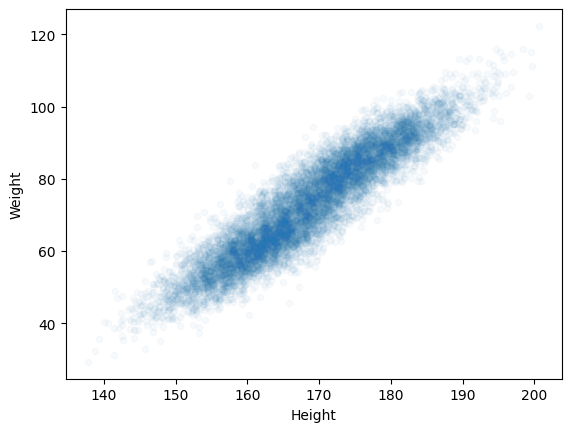

In [43]:
hw.plot(x='Height', y='Weight', kind='scatter', alpha=0.03) 

Достаточно наглядно. Что если поиграть с прозрачностью ещё?

<Axes: xlabel='Height', ylabel='Weight'>

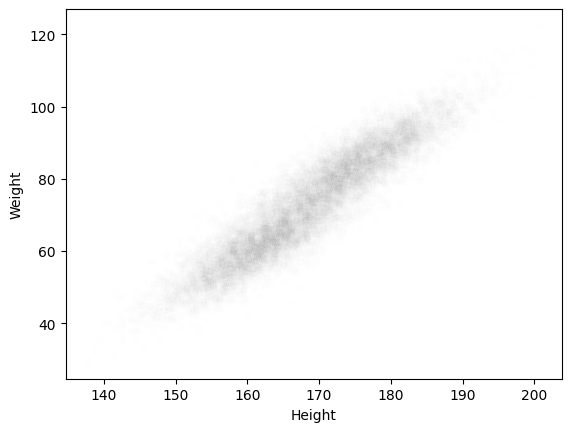

In [44]:
hw.plot(x='Height', y='Weight', kind='scatter', alpha=0.003) 

Это уже слишком. Ничего не разглядеть. Остановимся на значении **alpha** из второго эксперимента.

Способ 2.

Когда точек много, и каждая в отдельности не интересна, данные отображают особым способом. График делят на ячейки; пересчитывают точки в каждой ячейке. Затем ячейки заливают цветом: чем больше точек — тем цвет гуще.

Такой тип графика задают через параметр **kind**, ему присваивают значение **hexbin** (от англ. hexagonal binning plot, «график, поделённый на шестиугольные области»).

Число ячеек по горизонтальной оси задают параметром **gridsize** (от англ. size of a grid, «размер сетки»), аналогом bins для hist().
Языки программирования придуманы людьми, и потому не идеальны. Бывает, при столкновении с багами приходится ставить «костыли». Здесь это параметр sharex=False. Если значение True, то пропадёт подпись оси x, а без sharex график выйдет неказистым — это «костыльный» обход бага библиотеки Pandas.


<Axes: xlabel='Height', ylabel='Weight'>

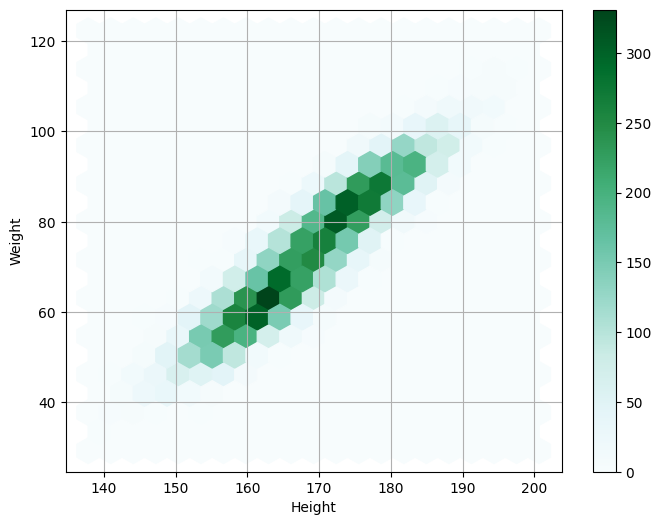

In [45]:
hw.plot(x='Height', y='Weight', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 

Какие красивые соты получились! Отчётливо видно, что в центре графика не однородное пятно, а определённая структура данных. В самой «густой» зоне люди с ростом от 170 до 175 см и весом от 55 до 60 кг (замеры явно производились на курорте, где отдыхают модели).

Смысл этого графика, как и у гистограммы — отображение частотности. Но на гистограмме показана только одна величина, а здесь две: нельзя сделать гистограмму одновременно и по росту, и по весу. Повышенная частота определённых сочетаний указывает на закономерность. Часто цель анализа данных в том и состоит, чтобы показать связь двух величин.
Например, как цена квартиры зависит от её площади? Влияет ли на стоимость жилья его удалённость от центра? А тихие соседи? Или цена квартиры связана с годом строительства дома?

Скорее всего, каждый из этих факторов по-своему влияет на конечную стоимость квартиры. Узнать, как именно и насколько сильно — это аналитическая задача. Её решают, изучая совместное распределение величин.

Взаимозависимость двух величин называется корреляция. График (да и жизненный опыт) позволяют утверждать, что рост и вес явно взаимосвязаны, или коррелируют. Очевидно не только наличие связи, но и прямая зависимость: чем больше рост, тем больше вес. В таком случае говорят, что корреляция положительная. А для Наполеона с его небольшим ростом высокие амбиции — пример отрицательной корреляции (уменьшение одной величины связано с увеличением другой).

То, что корреляция есть, понятно. Но как оценить численно, насколько тесна взаимосвязь? Для этого находят коэффициент корреляции Пирсона. Он помогает определить, как сильно меняется одна величина при изменении другой; и принимает значения от - 1 до 1.

Если с ростом первой величины, растёт вторая, то коэффициент корреляции Пирсона — положительный.

Если при изменении одной величины другая остаётся прежней, то коэффициент равен 0.

Если рост одной величины связан с уменьшением другой, коэффициент отрицательный.

Чем ближе коэффициент корреляции Пирсона к крайним значениям: 1 или -1, тем сильнее взаимозависимость. Если значение близко к нулю, значит связь слабая, либо отсутствует вовсе. Бывает, что коэффициент нулевой не потому, что связи между значениями нет, а из-за того, что у неё более сложный, не линейный характер. Потому-то коэффициент корреляции такую связь не берёт.

Коэффициент Пирсона находят методом **corr()** (от англ. correlation, «корреляция»). Метод применяют к столбцу с первой величиной, а столбец со второй передают в параметре. Какая первая, а какая вторая — неважно:

In [46]:
print(hw['Height'].corr(hw['Weight']))
print(hw['Weight'].corr(hw['Height'])) # поменяли местами рост и вес 


0.9247562987409147
0.9247562987409147


Корреляция в 0,952 говорит о наличии сильной статистической связи. Выходит, увеличение роста сопровождается прибавкой в весе, но так бывает не всегда.
Справедливо ли обратное: увеличивается ли рост при наборе веса? Насколько нам известно из жизненного опыта, нет. Хотя корреляция иллюстрирует зависимость между величинами, она не доказывает наличие причинно-следственной связи. Нельзя сказать, что прибавляя в весе, мы становимся выше (а жаль).
Итак, наличием корреляции причинно-следственную связь не докажешь, но и не опровергнешь. А что если мы будем анализировать не столь прозрачные данные?
## Задача 2
По данным из таблицы **station_stat_full** посчитайте коэффициент корреляции Пирсона между числом заездов на АЗС и временем заправки. Коэффициент выведите на экран.

In [47]:
print(station_stat_full['count'].corr(station_stat_full['time_spent']))

0.12242632473597156


# Матрица диаграмм рассеяния

Мы нашли корреляцию двух величин. Однако жизненные явления гораздо сложнее и могут зависеть от множества факторов.

Например, интересно изучить не только рост и вес, но и то, как на них влияет  пол.

К сожалению, нарисовать понятный график сразу для трех параметров нельзя. Однако можно построить диаграммы раcсеяния попарно для соответствующих параметров. В Pandas такую задачу решают не df.plot(), а специальным методом: **pd.plotting.scatter_matrix(df)** (от англ. scatter matrix, «матрица рассеяния»).

Возьмем для примера данные посетителей магазина: id, пол, возраст, доход, рейтинг трат (датасет Mall_Customers.csv)

array([[<Axes: xlabel='CustomerID', ylabel='CustomerID'>,
        <Axes: xlabel='Age', ylabel='CustomerID'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='CustomerID'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='CustomerID'>],
       [<Axes: xlabel='CustomerID', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Age'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Age'>],
       [<Axes: xlabel='CustomerID', ylabel='Annual Income (k$)'>,
        <Axes: xlabel='Age', ylabel='Annual Income (k$)'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Annual Income (k$)'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>],
       [<Axes: xlabel='CustomerID', ylabel='Spending Score (1-100)'>,
        <Axes: xlabel='Age', ylabel='Spending Score (1-100)'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>,
        <Axes: xlabel='Spending Score (1-100)',

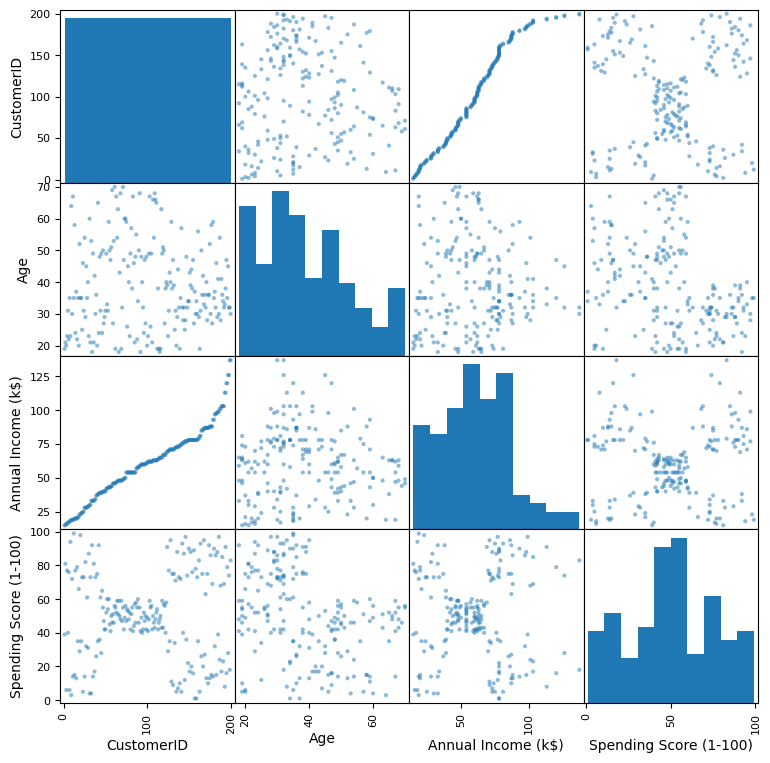

In [48]:
cust = pd.read_csv('Mall_Customers.csv')
pd.plotting.scatter_matrix(cust, figsize=(9, 9)) 

Красиво! Каждая ячейка показывает взаимосвязь пары параметров. Изучим их подробнее:

1) В  ячейке связь роста с ростом. Это не диаграмма рассеяния, а обычная гистограмма распределения по росту. Видно, что c возрастом люди реже посещают магазин.

2) В ячейке: связь возраста и дохода. Здесь мы видим,что люди старше 50 и младше 20 лет имеют достаточно низкий уровень дохода.

3) Возраст и рейтинг: нобходимо отметить пустоту в правом верхнем углу, что говорит о том, что люди старшего возраста обладают рейтингом, не превышающим 60 по стобалльной шкале.

Для всех пар столбцов можно найти коэффициент корреляции. Достаточно вызвать метод corr() без параметров.


In [ ]:
cust.corr() 

Такая таблица — матрица корреляции. Коэффициенты по диагонали всегда равны единице, ведь любая величина коррелирует сама с собой. Интересен в данной таблице коэффициент корреляции между возрастом и рейтингом, который показывает хоть и слабую, но обратную зависимость, т.е. с увеличением возраста, рейтинг падает. Именно это мы заметили при построении матрицы рассеяния.

## Задача 3

Найдём взаимосвязи в данных про АЗС. Возьмём нефильтрованную таблицу **data** (датасет visits) и для каждой АЗС взглянем на взаимосвязь среднего времени, среднего числа слишком быстрых заездов и слишком долгих заездов.

Создайте переменную **station_stat_multi** (путем применения команды **pivot_table**), где для каждой АЗС **(index='id')** будет 3 числа:

1.	среднее время (не медиана) заезда на АЗС;

2.	средняя доля быстрых заездов;

3.	средняя доля медленных заездов.   **(values=['time_spent', 'too_fast', 'too_slow'])**

Затем выведите на экран матрицу корреляции между этими величинами. Постройте диаграмму рассеяния попарно для всех величин методом scatter_matrix. Задайте размер 9х9 дюймов.
Напомним, что для нахождения слишком быстрых и медленных заездов использовались условия:

**data['too_fast'] = data['time_spent'] < 60**

**data['too_slow'] = data['time_spent'] > 1000**




            time_spent  too_fast  too_slow
time_spent         1.0       NaN       NaN
too_fast           NaN       NaN       NaN
too_slow           NaN       NaN       NaN


c:\Users\ivang\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\ivang\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\ivang\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='time_spent', ylabel='time_spent'>,
        <Axes: xlabel='too_fast', ylabel='time_spent'>,
        <Axes: xlabel='too_slow', ylabel='time_spent'>],
       [<Axes: xlabel='time_spent', ylabel='too_fast'>,
        <Axes: xlabel='too_fast', ylabel='too_fast'>,
        <Axes: xlabel='too_slow', ylabel='too_fast'>],
       [<Axes: xlabel='time_spent', ylabel='too_slow'>,
        <Axes: xlabel='too_fast', ylabel='too_slow'>,
        <Axes: xlabel='too_slow', ylabel='too_slow'>]], dtype=object)

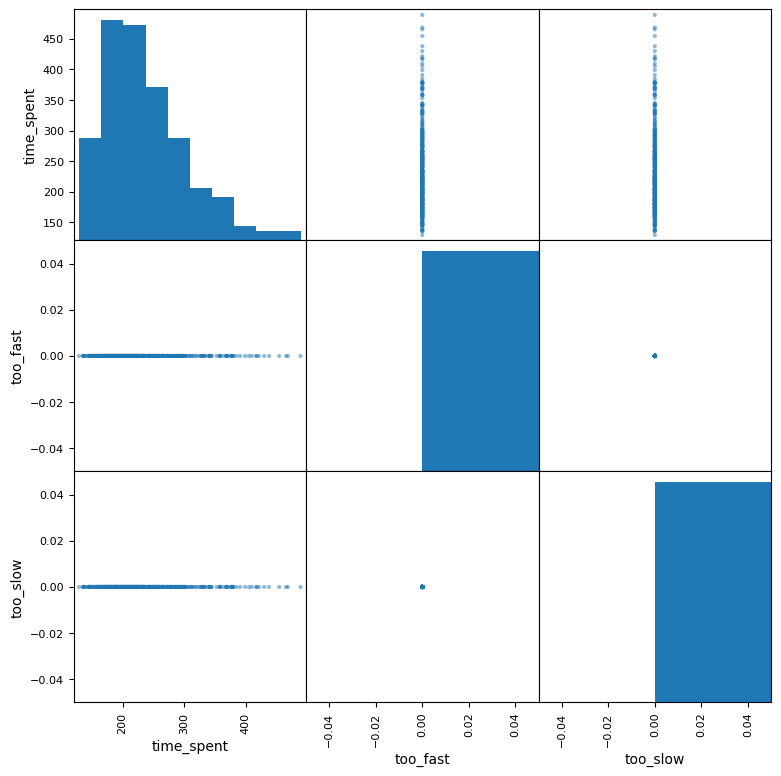

In [50]:
data=pd.read_csv('station_stat_full.csv')
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000
station_stat_multi = pd.pivot_table(data, index='id', values=['time_spent', 'too_fast', 'too_slow'], aggfunc={'time_spent': 'mean', 'too_fast': 'mean', 'too_slow': 'mean'})
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi, figsize=(9, 9)) 